In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
os.chdir(r"C:\Users\USER\Desktop\My Project\Parkinson's Disease Telemonitoring - Clustering")
os.getcwd()

"C:\\Users\\USER\\Desktop\\My Project\\Parkinson's Disease Telemonitoring - Clustering"

In [3]:
# create a function to wrangle the data
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

In [4]:
df = wrangle("parkinsons.csv")
print("Shape:", df.shape)
df.head()

Shape: (5875, 22)


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
# copy data
voice = df.copy()

In [6]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [7]:
# check for summary statistics of each column
voice.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


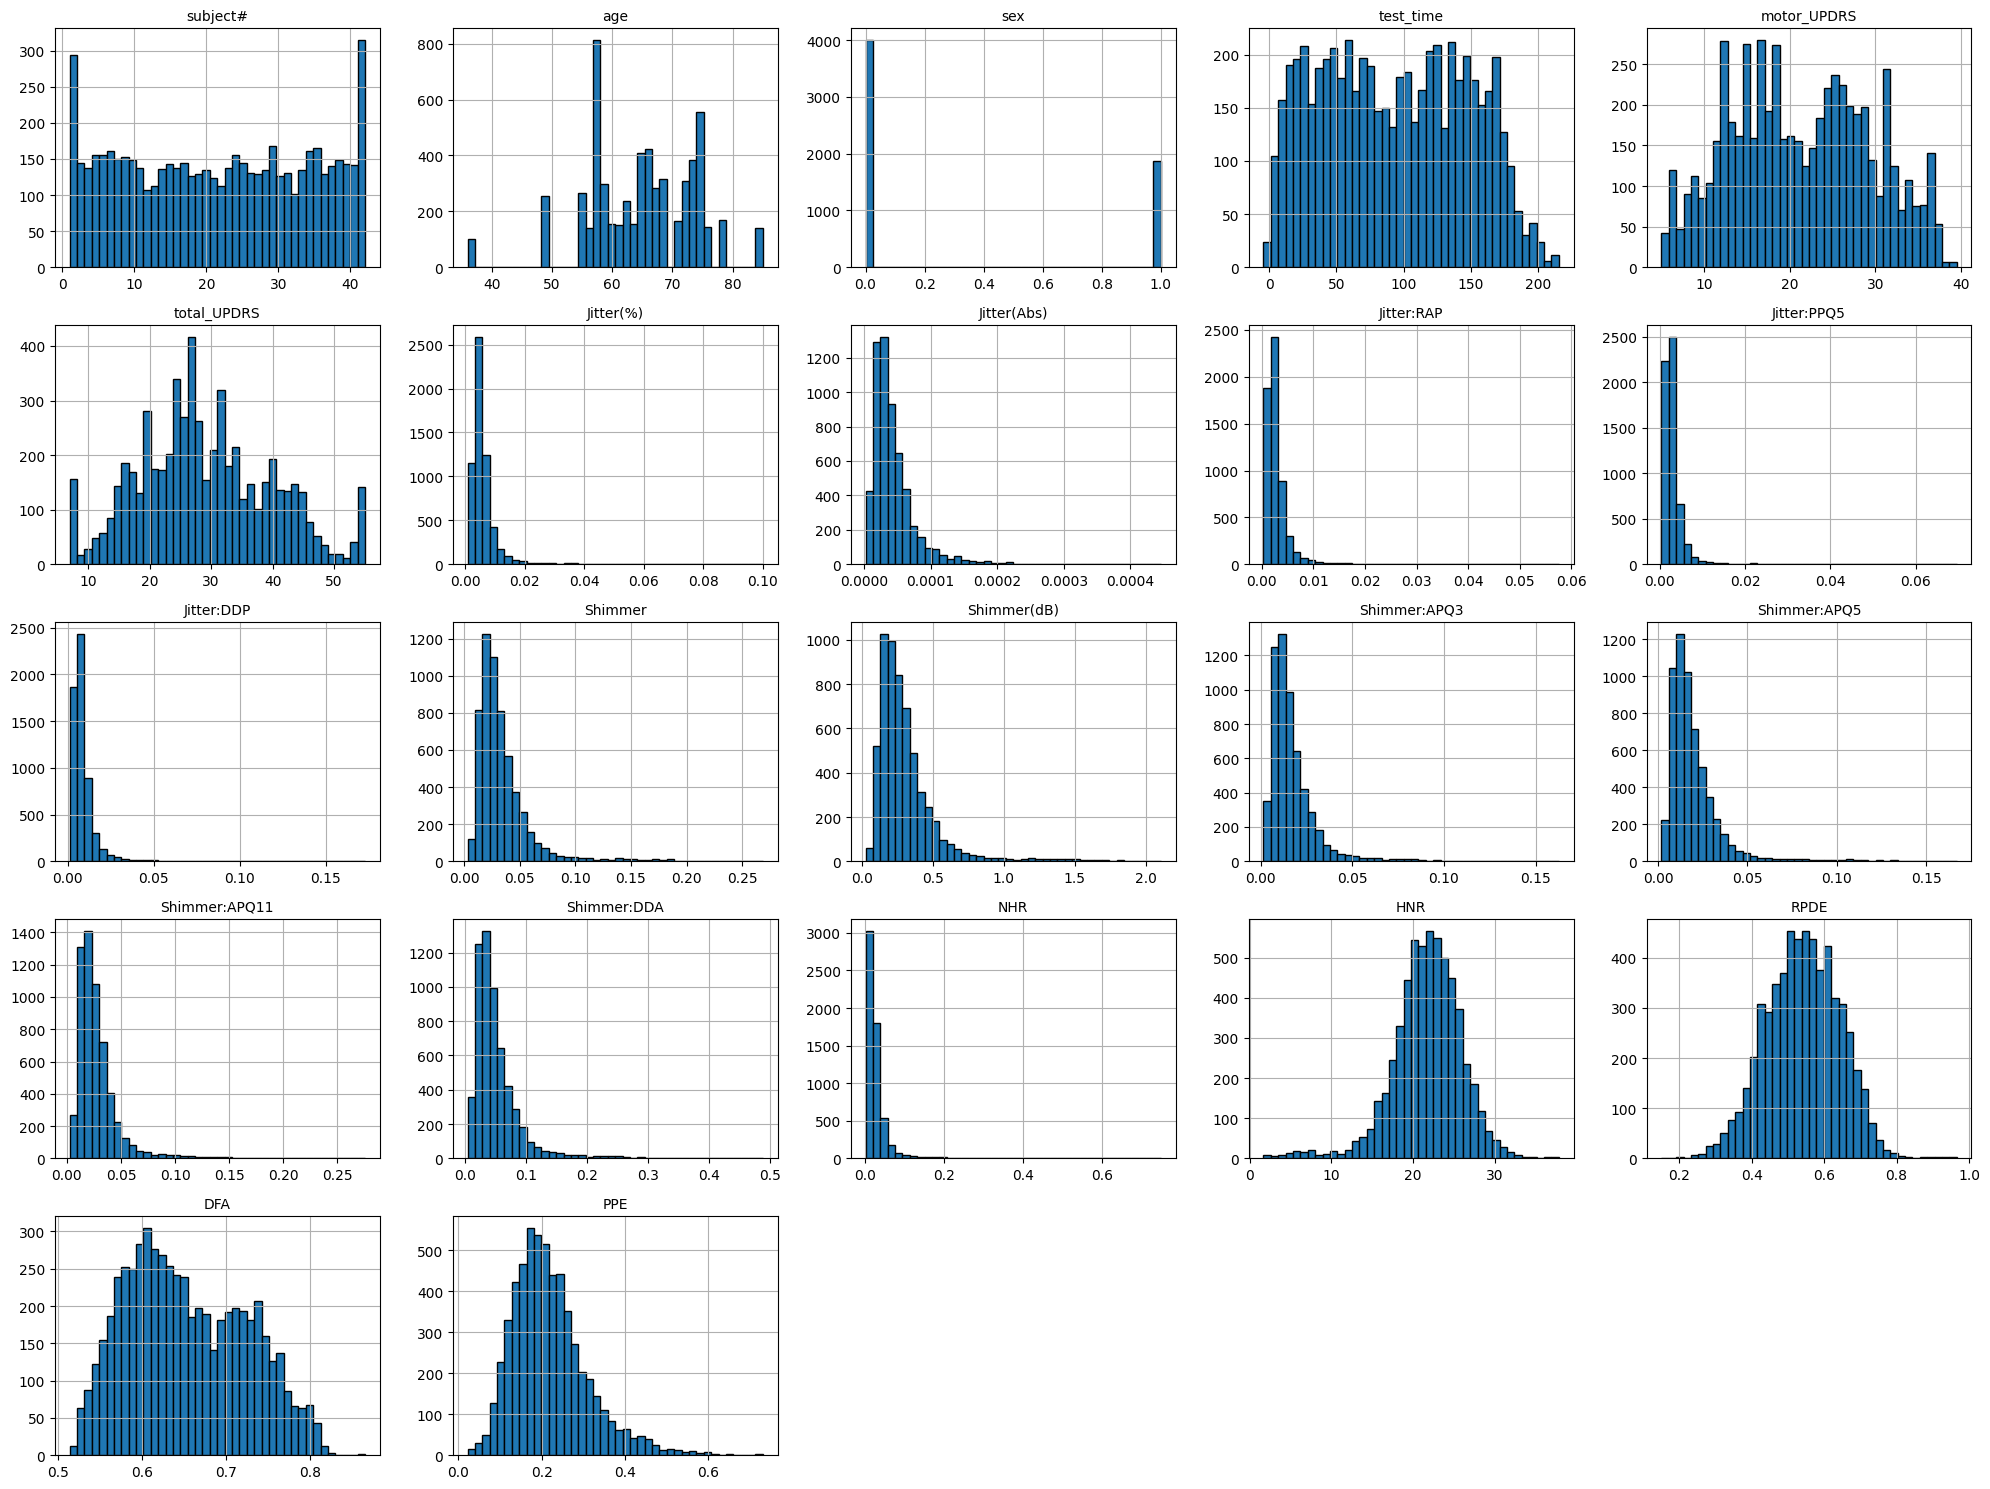

In [8]:
# Plot histograms for all features
n_cols = 5
n_rows = 5

plt.figure(figsize=(20, n_rows*3))
for i, col in enumerate(voice.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].hist(bins=40, edgecolor='black')
    plt.title(col, fontsize=10)
    plt.tight_layout()
    
plt.show();

* Some patients provided more recordings than others, while some recorded less frequently, with male patients contributing more than female
* Enrolled patients were across several distinct age brackets
* Time (no of days) ranged from a negative value, suggesting an inconsistency
* Many of the acoustic features, i.e. jitter and shimmer, are highly skewed.
* Clinical scores shows multimodality, which may suggest the presence of various natural subgroupings 


In [9]:
voice[voice["test_time"] < 0]

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
4531,34,59,0,-3.3125,29.291,34.146,0.00441,0.000037,0.00202,0.00239,...,0.178,0.01043,0.01063,0.01850,0.03128,0.031377,19.613,0.66328,0.64633,0.18148
4557,34,59,0,-3.3118,29.291,34.146,0.00225,0.000018,0.00108,0.00139,...,0.126,0.00750,0.00876,0.01388,0.02249,0.004839,24.733,0.54671,0.66910,0.11849
4584,34,59,0,-3.3118,29.291,34.146,0.00388,0.000031,0.00201,0.00183,...,0.200,0.01248,0.01251,0.01869,0.03743,0.019934,22.683,0.47744,0.66811,0.16363
4611,34,59,0,-3.3104,29.291,34.146,0.00617,0.000058,0.00322,0.00328,...,0.217,0.01269,0.01535,0.02694,0.03806,0.030033,18.866,0.69274,0.68188,0.24324
4638,34,59,0,-3.3097,29.291,34.145,0.00353,0.000028,0.00159,0.00180,...,0.366,0.02035,0.02340,0.02963,0.06105,0.016998,22.557,0.53959,0.63769,0.14206
4665,34,59,0,-3.3097,29.291,34.145,0.00266,0.000019,0.00134,0.00158,...,0.314,0.01776,0.01985,0.02586,0.05328,0.011116,24.287,0.53466,0.60263,0.14682
5725,42,61,0,-4.2625,19.725,28.633,0.01533,0.000118,0.00774,0.00800,...,0.908,0.05904,0.05315,0.04576,0.17713,0.132810,11.689,0.70273,0.66975,0.48466
5750,42,61,0,-4.2625,19.725,28.633,0.00615,0.000046,0.00266,0.00291,...,0.316,0.01907,0.02229,0.03109,0.05721,0.014472,21.127,0.49411,0.70068,0.22985
5775,42,61,0,-4.2618,19.725,28.633,0.00626,0.000048,0.00300,0.00274,...,0.200,0.00984,0.01105,0.01820,0.02953,0.033013,24.559,0.47991,0.65597,0.22585
5800,42,61,0,-4.2604,19.725,28.634,0.00529,0.000044,0.00243,0.00275,...,0.225,0.01222,0.01470,0.02119,0.03667,0.030559,21.910,0.52372,0.66131,0.21283


* There are just two patients (Male) involved in having negative test time. Why?
* It is highly possible if retrospective studies were done, in which historical data were collected or the patient already started the recordings, before he was enrolled into the study.
* So, patient 34's data started 3 days to the study enrollment and patient 42, 4 days to the enrollment

In [10]:
voice.groupby("sex")["subject#"].nunique()

sex
0    28
1    14
Name: subject#, dtype: int64

* For the study, twice the number of female patients were enrolled, i.e., 28 males to 14 females, thereby leading to more recordings from men than women

In [11]:
# Does each of these variable differ by age
# Check using mean of each clinical variable to each gender
mean_updrs = df.groupby("sex")[["motor_UPDRS", "total_UPDRS"]].mean().T


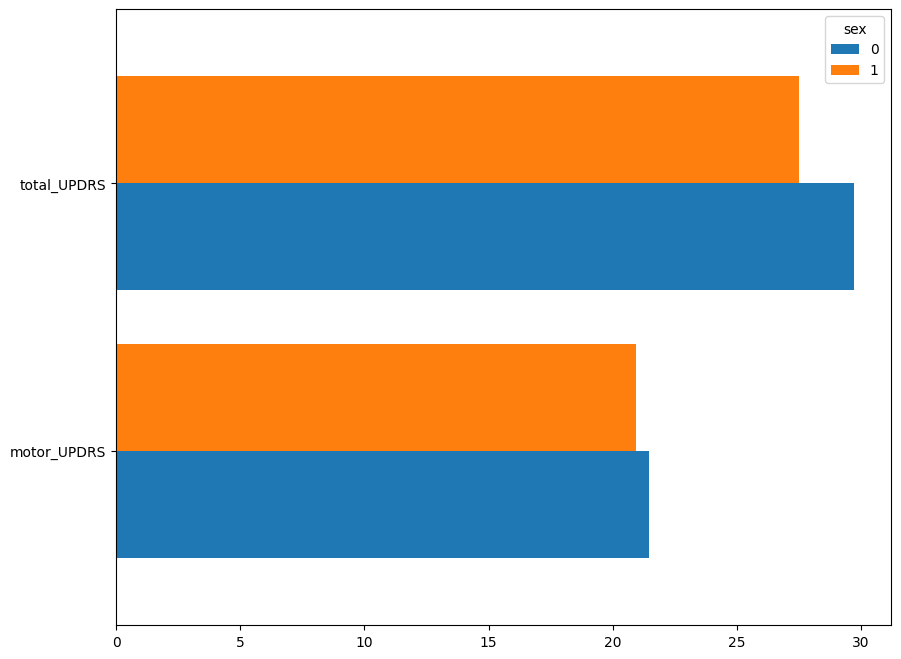

In [12]:
ax = mean_updrs.plot(
    kind="barh",
    figsize=(10,8),
    width=0.8
)

* Mean UPRDS score (motor and total) is higher for male patients

In [13]:
# Test this statistically
# select features
features = mean_updrs.index.to_list()
# Create an empty dictionary to store the results
results = {}

for feature in features:
    male_vals = voice.loc[voice["sex"] == 0, feature]
    female_vals = voice.loc[voice["sex"] == 1, feature]
    
    stats, p = ttest_ind(male_vals, female_vals, equal_var=False)
    results[feature] = {"t_statistic": stats, "p-value": p}
    
updrs_res = pd.DataFrame(results).T.sort_values("p-value")
updrs_res

,t_statistic,p-value
total_UPDRS,7.740019,1.248157e-14
motor_UPDRS,2.318180,2.049905e-02


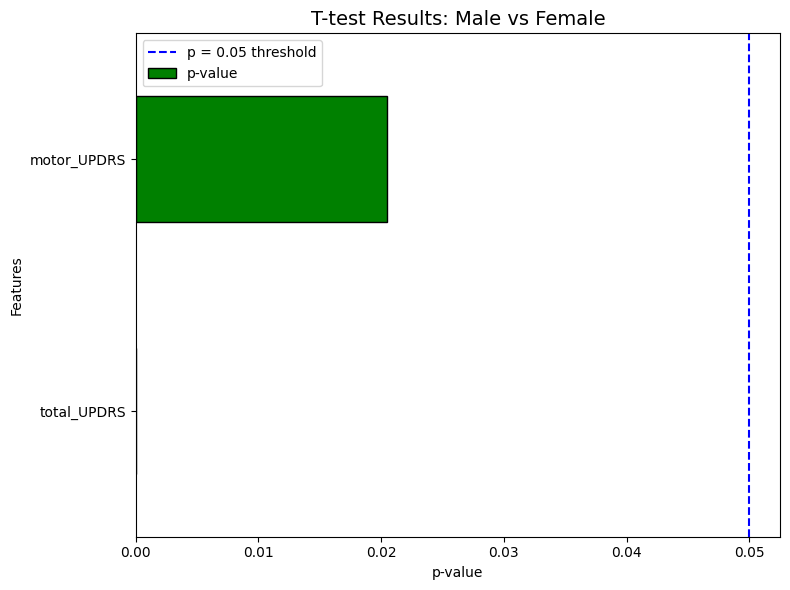

In [14]:
# Create color mask: green for significant, red for not
colors = ["green" if p < 0.05 else "red" for p in updrs_res["p-value"]]

# Create an horizontal bar chart
plt.figure(figsize=(8, 6))
updrs_res["p-value"].plot(
    kind="barh",
    color=colors,
    edgecolor="black"
)
plt.axvline(0.05, color="blue", linestyle="--", label="p = 0.05 threshold")
plt.title("T-test Results: Male vs Female", fontsize=14)
plt.xlabel("p-value")
plt.ylabel("Features")
plt.legend()
plt.tight_layout()
plt.show();

* The T-test shows that the difference in the mean value of motor_UPDRS and total_UPDRS are statistically significant

In [15]:
# Select jitter and shimmer features
jitter_shimmer_cols = [
    "Jitter(%)", "Jitter(Abs)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP",
    "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5",
    "Shimmer:APQ11", "Shimmer:DDA"
]

# Group by sex and compute mean
mean_by_sex = df.groupby("sex")[jitter_shimmer_cols].mean().T

mean_by_sex


sex,0,1
Jitter(%),0.005956,0.006577
Jitter(Abs),0.000048,0.000036
Jitter:RAP,0.002824,0.003338
Jitter:PPQ5,0.003053,0.003758
Jitter:DDP,0.008471,0.010015
Shimmer,0.033000,0.036258
Shimmer(dB),0.302085,0.330013
Shimmer:APQ3,0.016750,0.018027
Shimmer:APQ5,0.019407,0.021727
Shimmer:APQ11,0.027162,0.028165


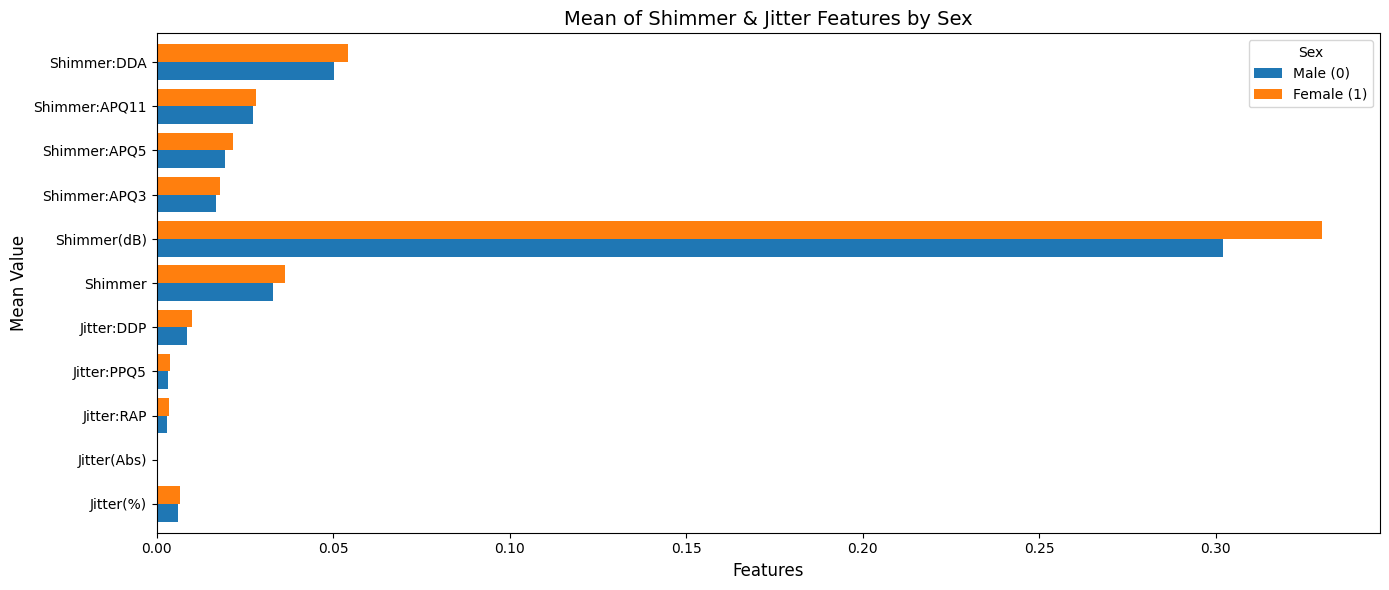

In [16]:
# Plot a chart for this
ax = mean_by_sex.plot(
    kind="barh",
    figsize=(14,6),
    width=0.8
)
plt.title("Mean of Shimmer & Jitter Features by Sex", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.legend(title="Sex", labels=["Male (0)", "Female (1)"])
plt.tight_layout()
plt.show()

* However, the shimmer and jitter mean scores are more higher in female patients than in male patients
* Let's check if this difference is statistically significant

In [17]:
# List the features I want to test for
features = mean_by_sex.index.to_list()

# Create an empty dictionary to store results
results = {}

for feature in features:
    male_vals = voice.loc[voice["sex"] == 0, feature]
    female_vals = voice.loc[voice["sex"] == 1, feature]
    
    stat, p = ttest_ind(male_vals, female_vals, equal_var=False)
    results[feature] = {"t-statistic": stat, "p-value": p}
    
# Convert results to DataFrame
t_test_results = pd.DataFrame(results).T.sort_values("p-value")
t_test_results

,t-statistic,p-value
Jitter(Abs),11.104887,4.095148e-28
Jitter:PPQ5,-5.248978,1.676344e-07
Jitter:RAP,-5.028325,5.287817e-07
Jitter:DDP,-5.027324,5.315217e-07
Shimmer:APQ5,-3.943053,8.288541e-05
Shimmer,-3.654418,2.633946e-04
Shimmer(dB),-3.518379,4.423915e-04
Jitter(%),-3.257943,1.137675e-03
Shimmer:DDA,-2.943231,3.277019e-03
Shimmer:APQ3,-2.943212,3.277219e-03


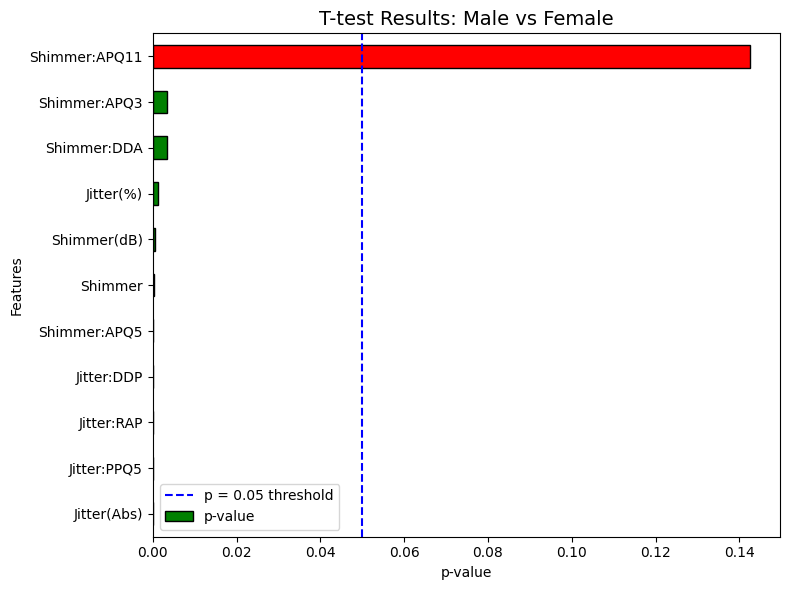

In [18]:
# Create color mask: green for significant, red for not
colors = ["green" if p < 0.05 else "red" for p in t_test_results["p-value"]]

# Create an horizontal bar chart
plt.figure(figsize=(8, 6))
t_test_results["p-value"].plot(
    kind="barh",
    color=colors,
    edgecolor="black"
)
plt.axvline(0.05, color="blue", linestyle="--", label="p = 0.05 threshold")
plt.title("T-test Results: Male vs Female", fontsize=14)
plt.xlabel("p-value")
plt.ylabel("Features")
plt.legend()
plt.tight_layout()
plt.show();

Most of these shimmer and jitter variable, except Shimmer:APQ11 shows statistically significant differences between males and females, which could own to the natural voice physiology differences.

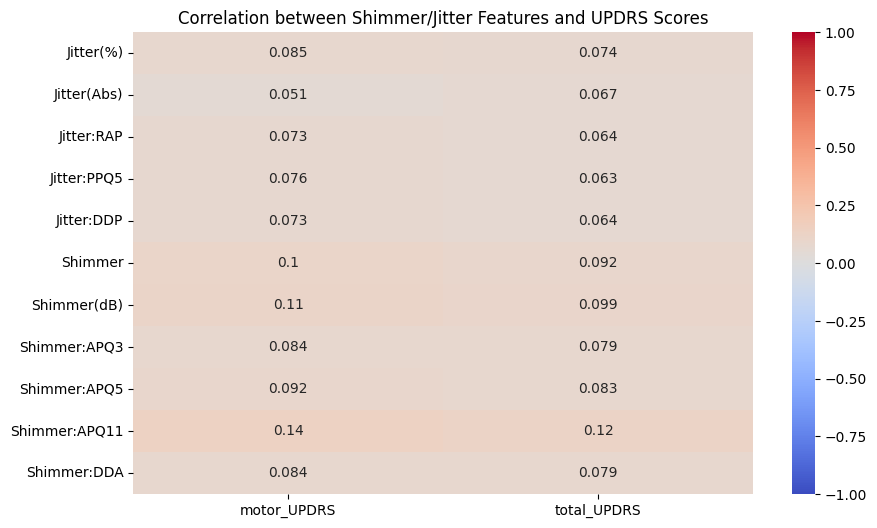

In [19]:
# How well do these acoustic features relate to the interpolated clinical severity scores
target_cols = ["motor_UPDRS","total_UPDRS"]

subset = voice[jitter_shimmer_cols + target_cols]

# compute the correlation matrix
corr = subset.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr[target_cols].iloc[:-2],  # exclude UPDRS self-correlation
            annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Shimmer/Jitter Features and UPDRS Scores")
plt.show()

There is absolutely no correlation between the acoustic features and the interpolated clinical severity. This could be owing to the fact that several other factors contribute to the UPDRS scores, both motor and non-motor factors.

Based on this, we'll not include the UPDRS scores in our clustering, so that the clusters won't be forced to align with disease severity and also to not stray from our objective of grouping the patients based on their vocal features

## Age-Based Analysis

In [20]:
# Group the Age into bins
bins = [30, 40, 50, 60, 70, 80, 90]
labels = ["30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]

voice["age_group"] = pd.cut(voice["age"], bins=bins, labels=labels, right=False)

In [21]:
# Compare the acoustic features across the different age groups
age_means = voice.groupby("age_group")[jitter_shimmer_cols].mean().T

C:\Users\USER\AppData\Local\Temp\ipykernel_27520\998200648.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = voice.groupby("age_group")[jitter_shimmer_cols].mean().T


In [22]:
age_means

age_group,30-39,40-49,50-59,60-69,70-79,80-89
Jitter(%),0.003679,0.007443,0.005143,0.007034,0.005916,0.006118
Jitter(Abs),0.000020,0.000063,0.000036,0.000050,0.000043,0.000043
Jitter:RAP,0.001750,0.003701,0.002510,0.003482,0.002752,0.003135
Jitter:PPQ5,0.001853,0.003926,0.002606,0.003904,0.003095,0.003108
Jitter:DDP,0.005250,0.011104,0.007531,0.010446,0.008257,0.009405
Shimmer,0.019409,0.037149,0.024554,0.039104,0.036390,0.035708
Shimmer(dB),0.177911,0.330188,0.225295,0.355916,0.334632,0.326289
Shimmer:APQ3,0.009649,0.018509,0.012559,0.019680,0.018204,0.018694
Shimmer:APQ5,0.010981,0.021903,0.014446,0.023218,0.021578,0.020992
Shimmer:APQ11,0.014507,0.030226,0.019752,0.030477,0.030945,0.027444


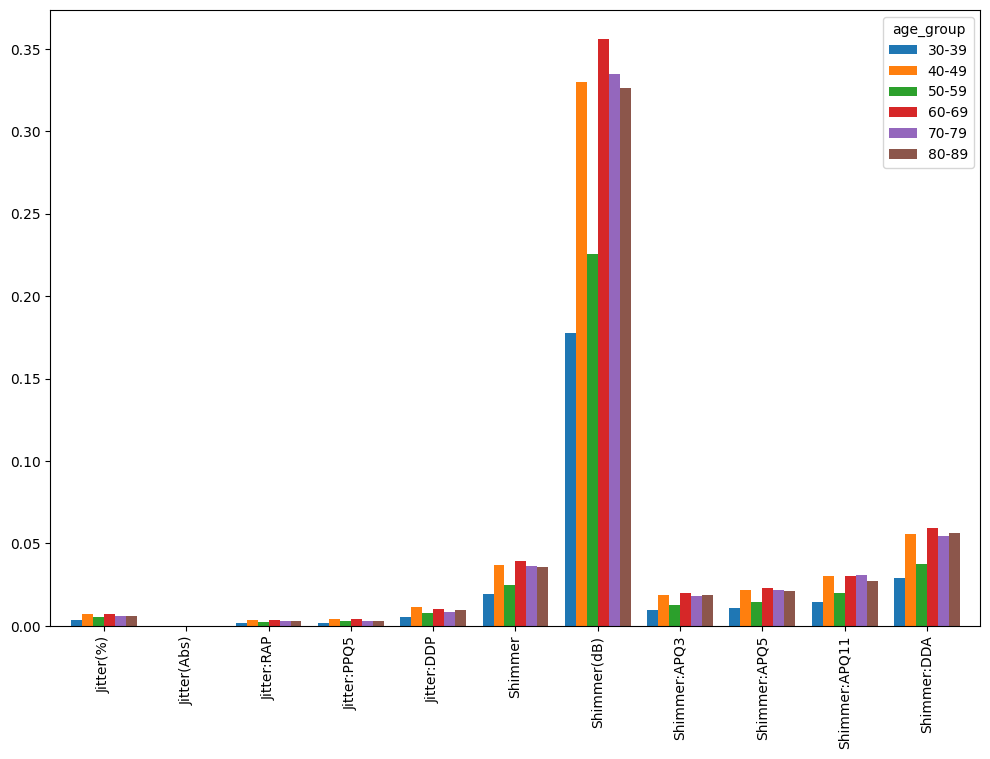

In [23]:
# Plot
age_means.plot(
    kind="bar",
    figsize=(12, 8),
    width=0.8
);

In [24]:
feat = (voice.drop(
    columns=["age_group", "subject#", "test_time", "total_UPDRS", "motor_UPDRS", "sex"])
                    .var()
                    .sort_values()
)
feat

Jitter(Abs)      1.294802e-09
Jitter:RAP       9.758245e-06
Jitter:PPQ5      1.392436e-05
Jitter(%)        3.163194e-05
Jitter:DDP       8.782483e-05
Shimmer:APQ3     1.752213e-04
Shimmer:APQ5     2.776867e-04
Shimmer:APQ11    3.994460e-04
Shimmer          6.674554e-04
Shimmer:DDA      1.576995e-03
NHR              3.563171e-03
DFA              5.027093e-03
PPE              8.371974e-03
RPDE             1.019813e-02
Shimmer(dB)      5.301675e-02
HNR              1.841351e+01
age              7.781928e+01
dtype: float64

In [25]:
features = feat.index.to_list()
X = voice[features].drop(columns=["age", "Jitter(Abs)", "Jitter:RAP",
                         "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:APQ11",
                         "RPDE", "DFA"])

In [26]:
# Find the best k
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

for k in n_clusters:
    model = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=k, random_state=42)
    )
    model.fit(X)
    model
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    silhouette_scores.append(silhouette_score(X, model.named_steps["kmeans"].labels_))

In [27]:
silhouette_scores

[0.6479881401650974,
 0.39276320144083465,
 0.34708717342566564,
 0.26664564590549034,
 0.20875664512827005,
 0.2026254969598547,
 0.15735302720920188,
 0.09897974932207687,
 0.08813760136416281,
 0.04077369977920441,
 0.03148128852834157]

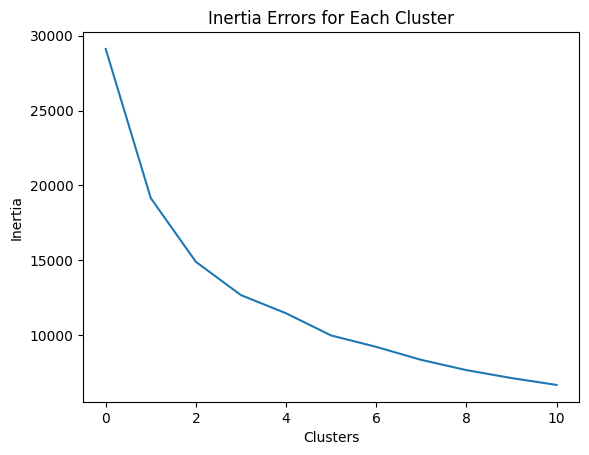

In [28]:
plt.plot(inertia_errors)
plt.title("Inertia Errors for Each Cluster")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show();

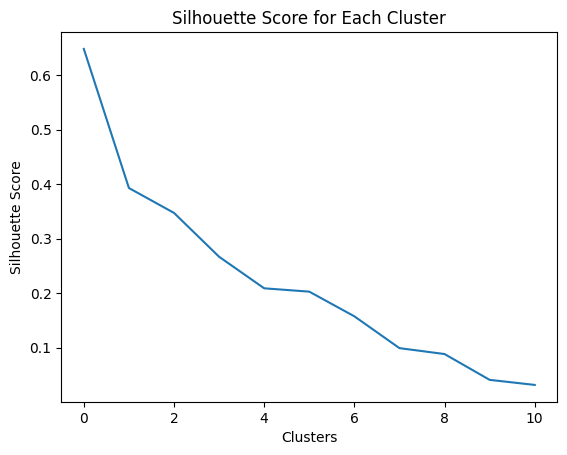

In [29]:
plt.plot(silhouette_scores)
plt.title("Silhouette Score for Each Cluster")
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show();

In [30]:
# Train final model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=2, random_state=42)
)
final_model.fit(X)

,steps,"[('standardscaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [31]:
# Apply PCA
# Scale the data
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
voice_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
voice_pca.head()

,PC1,PC2
0,-0.462615,-0.393339
1,-1.985143,-0.135538
2,-1.166931,-0.471871
3,-0.374752,-0.342807
4,-1.797276,-0.291698


In [32]:
# Plot the PCA
px.scatter(
    data_frame = voice_pca,
    x = "PC1",
    y = "PC2",
    color = final_model.named_steps["kmeans"].labels_.astype(str)
)

In [33]:
# Put clustered data into dataframe
xgb = X.groupby(final_model.named_steps["kmeans"].labels_).mean()
xgb

,Jitter:PPQ5,Jitter(%),Jitter:DDP,Shimmer,Shimmer:DDA,NHR,PPE,Shimmer(dB),HNR
0,0.002790,0.005444,0.007801,0.030646,0.046528,0.023506,0.212057,0.280817,22.097045
1,0.017833,0.027378,0.043703,0.135451,0.199237,0.289854,0.444963,1.212858,9.185974


In [34]:
px.bar(
    xgb,
    barmode="group"
)

* Based on Medical Findings, the jitter and shimmer values from a pathological voice would be higher than that from a healthy voice. Same with Pitch Period Entropy (PPE). 
* Also the harmonics to noise ratio (HNR) are lower in PD-affected voices than in healthy voices
* Since Studies show that no baseline values were established in distingusishing pathological values of Detrended Flunctuation Analysis (DFA) and Recurrent Period Density Entropy (RPDE), they will be excluded from the Analysis

* Essentially, from analysis, it can be seen that the cluster with lower perturbation measures and higher HNR seem to have a milder impairment than those with higher perturbation measures and lower HNR.